#지도 그래프 시각화

In [2]:
pip install k-means-constrained


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 51.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.7 MB/s eta 0:00:00
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 34.1 MB/s eta 0:00:00
  Created wheel for k-means-constrained: filename=k_means_constrained-0.7.2-cp310-cp310-linux_x86_64.whl size=1960924 sha256=7d2722c2d7e78f1bb27afd90d817230f564bb75a0ba14605a0512ed52235eb58
  Stored in directory: /root/.cache/pip/wheels/b3/ab/f8/28a8bc667cc54e9827a6281af60d55b2819fecc630f652b62a
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninst

In [ ]:
pip install --upgrade numpy


5     863
14    854
16    846
0     572
8     554
2     477
4     475
12    470
3     403
1     342
10    342
11    336
15    311
13    224
9     204
17    203
6     197
7     101
dtype: int64


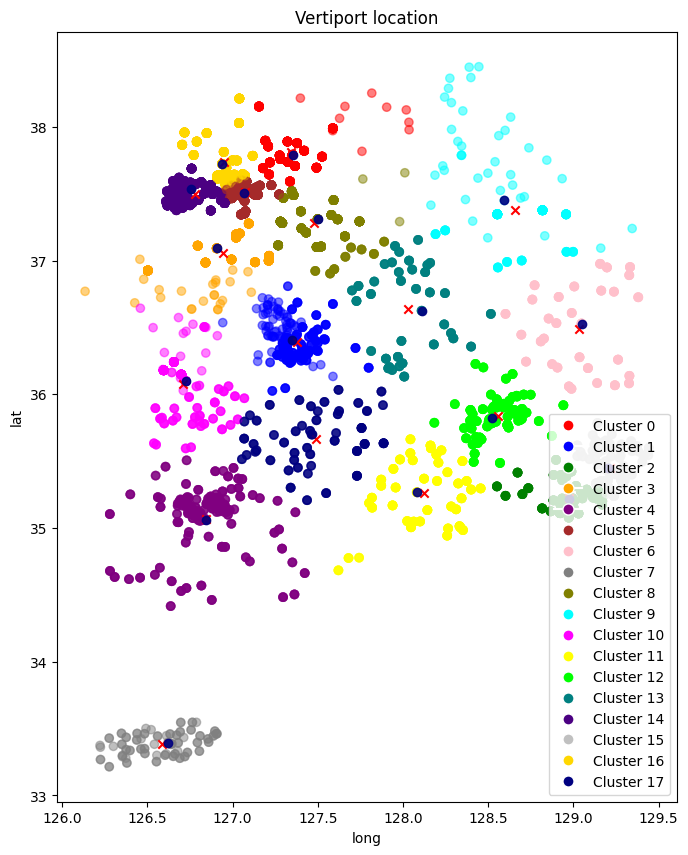

중심점 1 좌표: (37.81230362079901, 127.34200406964031)
가장 가까운 점 좌표: (37.79203100352012, 127.351541512092)

중심점 2 좌표: (36.39013396168143, 127.37534472096965)
가장 가까운 점 좌표: (36.403397978339285, 127.34977683486483)

중심점 3 좌표: (35.22364703544774, 128.97076761796598)
가장 가까운 점 좌표: (35.219276634326555, 128.9743481183757)

중심점 4 좌표: (37.05616807125304, 126.94163174771096)
가장 가까운 점 좌표: (37.09256330499734, 126.90711627877522)

중심점 5 좌표: (35.06600224749693, 126.84641378154045)
가장 가까운 점 좌표: (35.060851565075474, 126.84197565508288)

중심점 6 좌표: (37.51012549144639, 127.07048258048104)
가장 가까운 점 좌표: (37.50463000500513, 127.06590516274645)

중심점 7 좌표: (36.492394513467914, 129.03243116669637)
가장 가까운 점 좌표: (36.52997310069688, 129.04694100065316)

중심점 8 좌표: (33.387464103447456, 126.58561935044139)
가장 가까운 점 좌표: (33.39616132357018, 126.62190097311274)

중심점 9 좌표: (37.27801625141779, 127.47836061322752)
가장 가까운 점 좌표: (37.31020476563264, 127.49938333504107)

중심점 10 좌표: (37.378399595463485, 128.65392768700735)
가장 가까운 점 좌

In [9]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from k_means_constrained import KMeansConstrained # constrained K means 모듈
from scipy.spatial.distance import cdist

# 데이터 불러오기
data = pd.read_csv('/content/Vertiport_candidates (1).csv')
# 위도와 경도 추출
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# 데이터 준비 (위도, 경도를 하나의 배열로 만들기)
coordinates = pd.concat([latitude, longitude], axis=1)

# constrained K-means 알고리즘을 사용하여 20개의 초기 중심점을 설정하고 그룹 나누기
C_kmeans = KMeansConstrained(
            n_clusters=18,
            size_min=0,
            size_max=np.trunc(len(coordinates)/18*2),
            random_state=2
            )
C_kmeans.fit_predict(coordinates)
labels = C_kmeans.labels_
centroids = C_kmeans.cluster_centers_

# 위치 시각화
cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
    10: 'magenta',
    11: 'yellow',
    12: 'lime',
    13: 'teal',
    14: 'indigo',
    15: 'silver',
    16: 'gold',
    17: 'navy'
}


color_map = [cluster_color_map[label] for label in labels]

plt.figure(figsize=(8, 10))
scatter = plt.scatter(longitude, latitude, c=color_map, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')


# 클러스터링 결과에 따라 색상과 클러스터 번호를 지정하여 범례를 추가
legend_elements = []
for cluster_num, color in cluster_color_map.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(cluster_num), markerfacecolor=color, markersize=8))

# 그래프에 범례 추가
plt.legend(handles=legend_elements, loc='lower right')

# 갯수 카운트
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)



# 초기 중심점에서 가장 가까운 점들 추출
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# 위치 시각화

plt.scatter(closest_points['Longitude (deg)'], closest_points['Latitude (deg)'], color='navy', alpha=0.9)
plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

# 초기 중심점과 가장 가까운 점들 출력
for i in range(len(centroids)):
    centroid = centroids[i]
    closest_point = closest_points.iloc[i]
    cluster_num = labels[i]  # 클러스터 번호 가져오기
    print(f"중심점 {i+1} 좌표: ({centroid[0]}, {centroid[1]})")
    print(f"가장 가까운 점 좌표: ({closest_point['Latitude (deg)']}, {closest_point['Longitude (deg)']})")
    print()

In [6]:
import folium

# 대한민국 지도 생성
map_korea = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 좌표를 지도에 추가
for i in range(len(data)):
    folium.CircleMarker(
        location=[data.loc[i, 'Latitude (deg)'], data.loc[i, 'Longitude (deg)']],
        radius=5,
        color=color_map[labels[i]],
        fill_color=color_map[labels[i]],
        fill_opacity=0.5
    ).add_to(map_korea)

# # 초기 중심점을 지도에 추가
# for centroid in centroids:
#     folium.Marker(
#         location=[centroid[0], centroid[1]],
#         icon=folium.Icon(icon='crosshair', color='red')
#     ).add_to(map_korea)

# 가장 가까운 점을 지도에 추가
for i in range(len(centroids)):
    closest_point = closest_points.iloc[i]
    folium.Marker(
        location=[closest_point['Latitude (deg)'], closest_point['Longitude (deg)']],
        icon=folium.Icon(color='pink', icon='cloud')
    ).add_to(map_korea)

# 지도 저장
map_korea.save('/content/vertiport_map.html')


In [10]:
import folium

# 대한민국 지도 생성
map_korea = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 좌표를 지도에 추가
for i in range(len(data)):
    folium.CircleMarker(
        location=[data.loc[i, 'Latitude (deg)'], data.loc[i, 'Longitude (deg)']],
        radius=5,
        color='blue',  # 모든 점을 파란색으로 설정
        fill_color='blue',  # 모든 점을 파란색으로 설정
        fill_opacity=0.3
    ).add_to(map_korea)

# 가장 가까운 점을 지도에 추가
for i in range(len(centroids)):
    closest_point = closest_points.iloc[i]
    folium.Marker(
        location=[closest_point['Latitude (deg)'], closest_point['Longitude (deg)']],
        icon=folium.Icon(color='pink', icon='cloud')
    ).add_to(map_korea)

# 지도 저장
map_korea.save('/content/vertiport_map3.html')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5     1548
14     746
0      514
8      500
4      475
2      469
12     461
16     417
3      375
11     353
10     341
1      337
15     311
13     222
9      204
17     203
6      197
7      101
dtype: int64


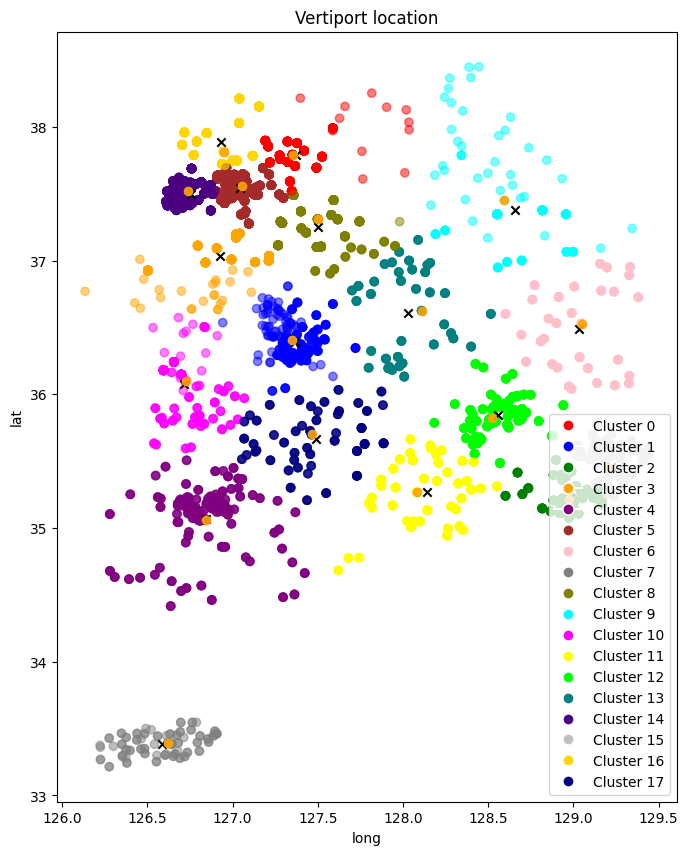

중심점 1 좌표: (37.79145608956551, 127.3723530695064)
가장 가까운 점 좌표: (37.79203100352012, 127.351541512092)

중심점 2 좌표: (36.39296764748069, 127.36907012688846)
가장 가까운 점 좌표: (36.403397978339285, 127.34977683486483)

중심점 3 좌표: (35.223609512535745, 128.9823535155977)
가장 가까운 점 좌표: (35.219276634326555, 128.9743481183757)

중심점 4 좌표: (37.03796635336842, 126.92846902412873)
가장 가까운 점 좌표: (37.09256330499734, 126.90711627877522)

중심점 5 좌표: (35.06600224749693, 126.84641378154045)
가장 가까운 점 좌표: (35.060851565075474, 126.84197565508288)

중심점 6 좌표: (37.54287847237681, 127.04333606922056)
가장 가까운 점 좌표: (37.55716611550631, 127.05675826499868)

중심점 7 좌표: (36.492394513467914, 129.03243116669637)
가장 가까운 점 좌표: (36.52997310069688, 129.04694100065316)

중심점 8 좌표: (33.38746410344745, 126.58561935044139)
가장 가까운 점 좌표: (33.39616132357018, 126.62190097311274)

중심점 9 좌표: (37.24863429221216, 127.5017103014867)
가장 가까운 점 좌표: (37.31020476563264, 127.49938333504107)

중심점 10 좌표: (37.378399595463485, 128.65392768700735)
가장 가까운 점 좌표: 

In [ ]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# 데이터 불러오기
data = pd.read_csv('/content/Vertiport_candidates (1).csv')
# 위도와 경도 추출
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# 데이터 준비 (위도, 경도를 하나의 배열로 만들기)
coordinates = pd.concat([latitude, longitude], axis=1)

# K-means 알고리즘을 사용하여 20개의 초기 중심점을 설정하고 그룹 나누기
kmeans = KMeans(n_clusters=18,random_state=2).fit(coordinates)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 위치 시각화
cluster_color_map = cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
    10: 'magenta',
    11: 'yellow',
    12: 'lime',
    13: 'teal',
    14: 'indigo',
    15: 'silver',
    16: 'gold',
    17: 'navy'}

color_map = [cluster_color_map[label] for label in labels]

plt.figure(figsize=(8, 10))
scatter = plt.scatter(longitude, latitude, c=color_map, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='black')


# 클러스터링 결과에 따라 색상과 클러스터 번호를 지정하여 범례를 추가
legend_elements = []
for cluster_num, color in cluster_color_map.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(cluster_num), markerfacecolor=color, markersize=8))

# 그래프에 범례 추가
plt.legend(handles=legend_elements, loc='lower right')

# 갯수 카운트
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)



# 초기 중심점에서 가장 가까운 점들 추출
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# 위치 시각화

plt.scatter(closest_points['Longitude (deg)'], closest_points['Latitude (deg)'], color='orange', alpha=0.9)
plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

# 초기 중심점과 가장 가까운 점들 출력
for i in range(len(centroids)):
    centroid = centroids[i]
    closest_point = closest_points.iloc[i]
    cluster_num = labels[i]  # 클러스터 번호 가져오기
    print(f"중심점 {i+1} 좌표: ({centroid[0]}, {centroid[1]})")
    print(f"가장 가까운 점 좌표: ({closest_point['Latitude (deg)']}, {closest_point['Longitude (deg)']})")
    print()

# 실루엣 시각화 코드

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


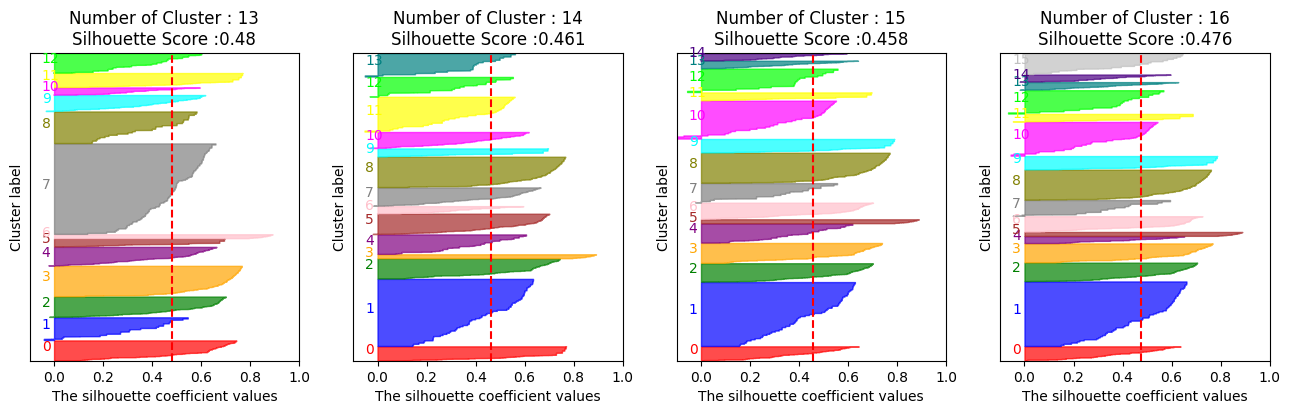

In [11]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

data = pd.read_csv('/content/Vertiport_candidates (1).csv')

def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster,random_state=2)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        cluster_color_map = cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
    10: 'magenta',
    11: 'yellow',
    12: 'lime',
    13: 'teal',
    14: 'indigo',
    15: 'silver',
    16: 'gold',
    17: 'navy',
    18: 'turquoise',
    19: 'maroon',
    20: 'black',
    21: 'white',
    22: 'violet',
    23: 'skyblue',
    24: 'coral'}


# 실루엣 막대 그래프의 색상 설정을 위한 color_map 리스트
        color_map = [cluster_color_map[label] for label in cluster_labels]

# 클러스터별 막대 그래프 색상 및 클러스터 번호 표시
        for i in range(n_cluster):
          ith_cluster_sil_values = sil_values[cluster_labels==i]
          ith_cluster_sil_values.sort()
          size_cluster_i = ith_cluster_sil_values.shape[0]
          y_upper = y_lower + size_cluster_i
          color = cluster_color_map[i]
          axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
          axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), color=color)
          y_lower = y_upper + 10

            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


# k=15,16,17,18일때
visualize_silhouette([13,14,15,16], data)

In [ ]:
# k=15,16,17,18일때
visualize_silhouette([16,17,18,16], data)

yellow brick elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

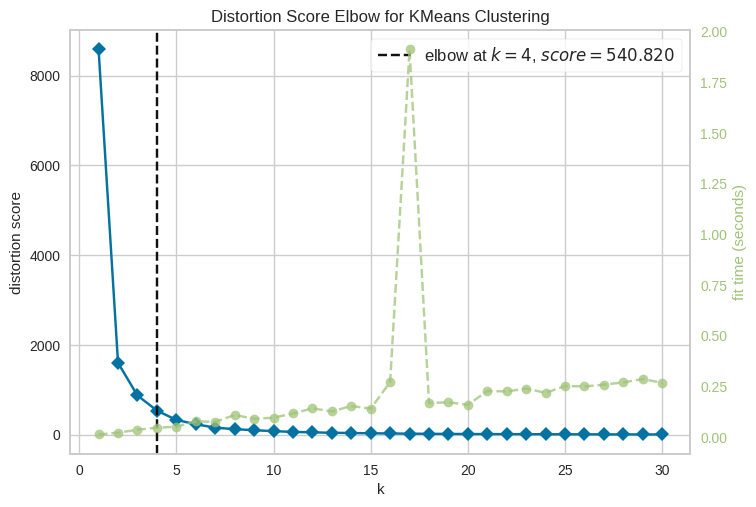

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 피처 데이터를 추출합니다.
X = data.iloc[:, 1:]

# KMeans 모델을 생성합니다.
model = KMeans(random_state=2)
# KElbowVisualizer를 사용하여 엘보우 기법을 시각화합니다.
visualizer = KElbowVisualizer(model, k=(1,31))
visualizer.fit(X)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

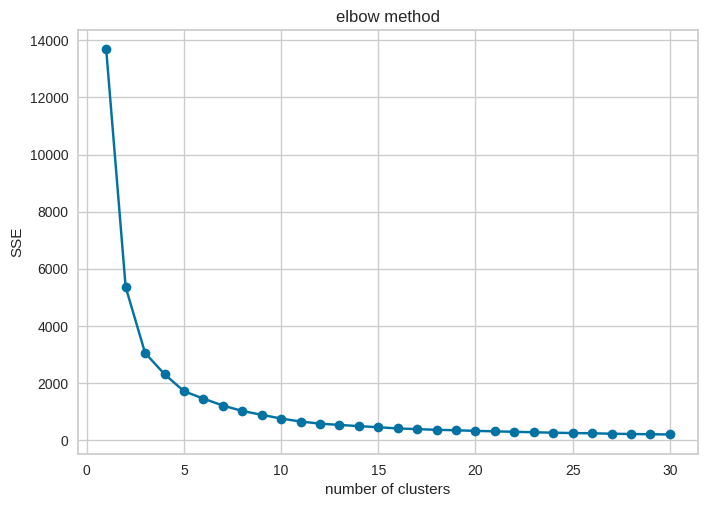

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i, random_state=2)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data, 31)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

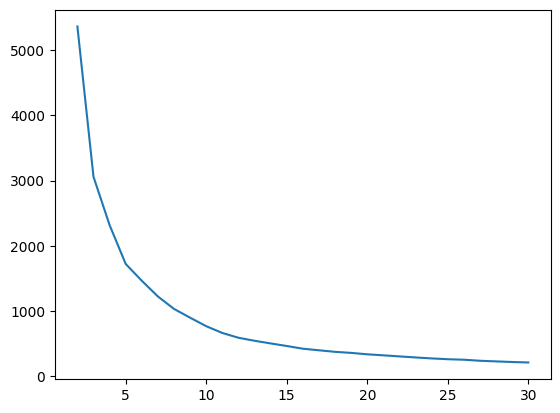

In [ ]:
import seaborn as sns

def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, random_state=2)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 31)], data)